<font size=5  color=#003366> <b> MEMOIRE Pauline Hermans</b><br><br> 
<b>Analyse du bruit et du mouvement</b></font> <br><br>
19 mai 2023
</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
from path import perso_path_string
import warnings


In [3]:
plt.rcParams["figure.figsize"] = (5,5)

perso_path, excel_path, subjects_path, patients_path, analysis_path, atlas_path, P_folder_path, Freesurfer_path = perso_path_string(on_cluster=False)

PATH_savefig_patients = P_folder_path + "Data\Outliers\Patients"
PATH_savefig_controls = P_folder_path + "Data\Outliers\Controls"

In [4]:
region_list = ["CC", "CC_genu", "CC_ant_midbody", "CC_post_midbody", "CC_isthmus", "CC_splenium", "UF_left", "UF_right", "UF"]
models = ["dti","diamond", "mf", "noddi"]
metric_list = {"dti" : ["FA", "MD", "AD", "RD"],"diamond" : ["wFA", "wMD", "wAD", "wRD" , "frac_csf" , "frac_ftot"],"mf" : ["fvf_tot", "frac_csf", "frac_ftot", "wfvf"],"noddi" : ["fiso", "fintra", "fextra", "odi"]}
comportment_list = ["BDI", "Total_OCDS", "OCDS_Obsessions", "OCDS_Compulsions", "STAI","MFI"]
time = ["T1", "T2"]
Stream_list = ["nb_stream", "mean_streamDensity", "std_streamDensity"]

In [5]:

datas_c = pd.read_excel(excel_path + "data_alcoholic_controls_rename.xlsx",index_col=0 )
datas_p = pd.read_excel(excel_path + "data_alcoholic_patients_rename.xlsx",index_col=0 )


In [6]:
data_p_T1 = datas_p[["Numéro", "wMean_FA_dti_T1_CC","wMean_FA_dti_T1_UF","Movement_T1",  "SNR_T1"]]
data_p_T1.head(53)

,Numéro,wMean_FA_dti_T1_CC,wMean_FA_dti_T1_UF,Movement_T1,SNR_T1
0,sub01,0.584670,0.378911,0.31,7.150000
1,sub02,0.642035,0.483558,0.22,15.120000
2,sub03,NaN,NaN,NaN,NaN
3,sub04,0.640055,0.509101,0.08,14.920000
4,sub05,0.649705,0.507101,0.17,13.990000
5,sub06,NaN,NaN,NaN,NaN
6,sub07,NaN,NaN,NaN,NaN
7,sub08,0.616186,0.469950,0.28,9.510000
8,sub09,0.633531,0.470578,0.19,18.330000
9,sub10,0.539019,0.403573,0.31,6.440000


In [7]:
data_p_T2 = datas_p[["Numéro", "wMean_FA_dti_T2_CC","wMean_FA_dti_T2_UF","Movement_T2",  "SNR_T2"]]
data_p_T2.head(53)

,Numéro,wMean_FA_dti_T2_CC,wMean_FA_dti_T2_UF,Movement_T2,SNR_T2
0,sub01,0.629276,0.478586,0.22,10.040000
1,sub02,0.650844,0.493275,0.20,17.760000
2,sub03,0.678198,0.440168,0.19,14.020000
3,sub04,0.649718,0.504618,0.05,19.020000
4,sub05,0.654405,0.486743,0.10,20.260000
5,sub06,0.655078,0.505451,0.13,17.620001
6,sub07,0.645570,0.482388,0.12,22.430000
7,sub08,0.629705,0.515596,0.15,13.240000
8,sub09,0.632367,0.454929,0.14,21.250000
9,sub10,NaN,NaN,NaN,NaN


In [8]:
def graph(T,m, data):
    data_T= data[["Numéro", "wMean_" + m + "_dti_" + T + "_CC","wMean_" + m + "_dti_" + T + "_UF","Movement_" + T,  "SNR_" + T]]
    fig = plt.figure(figsize=(10,10))
    value = 221
    Datas = ["wMean_" + m + "_dti_" + T + "_CC","wMean_" + m + "_dti_" + T + "_UF"]
    Noises = ["Movement_" + T,  "SNR_" + T]
    for d in Datas:
        for N in Noises:
            plt.subplot(value)
            for i in range(len(data_T[d])):
                plt.scatter(data_T[d][i], data_T[N][i])
            plt.xlabel("FA in " + d[-2:])
            plt.ylabel(N[:-3])
            if N[:-3] == "Movement":
                plt.axhspan(0.3,np.max(data_T[N])*1.1, facecolor='gray', alpha = 0.5) 
            else:
                plt.axhspan(np.min(data_T[N])*0.9, 10.1, facecolor='gray', alpha = 0.5)
            plt.title("FA in " + d[-2:] + " - " + N)
            value = value + 1

    plt.show()
    
def SNR_to_mouv(T,data):
    data_T= data[["Numéro","Movement_" + T,  "SNR_" + T]]

    for i in range(len(data_T["Movement_" + T])):
        plt.scatter(data_T["Movement_" + T][i], data_T["SNR_" + T][i])
    plt.axhspan(np.min(data_T["SNR_" + T])*0.9, 10.1, facecolor='gray', alpha = 0.5)
    plt.xlabel("Movement")
    plt.ylabel("SNR")
    plt.title(T)

    plt.show()

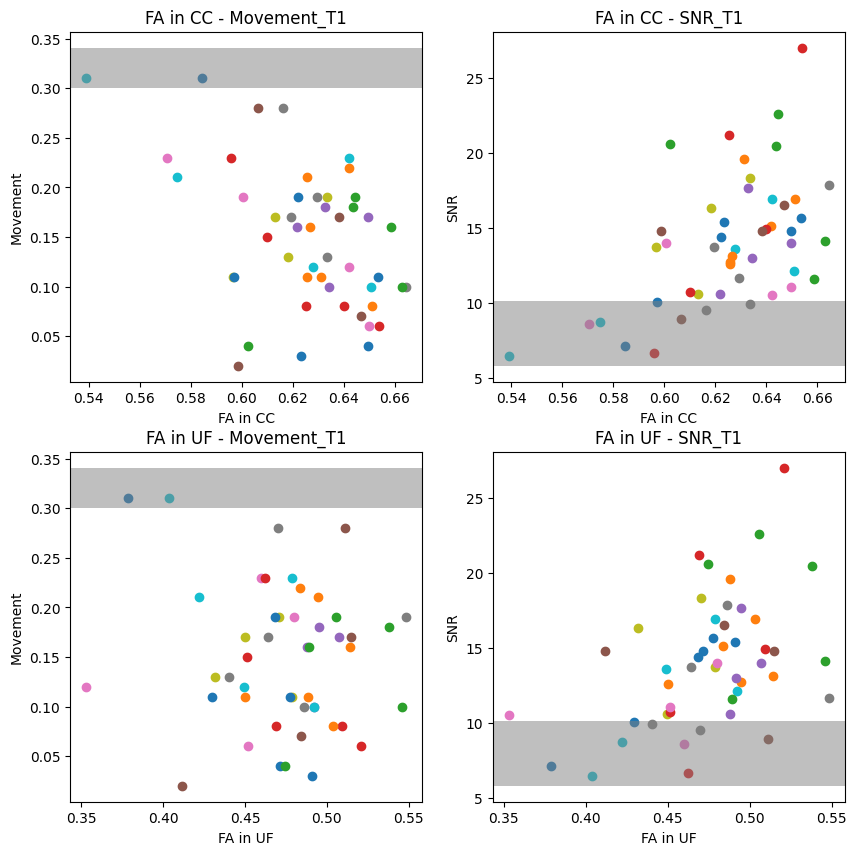

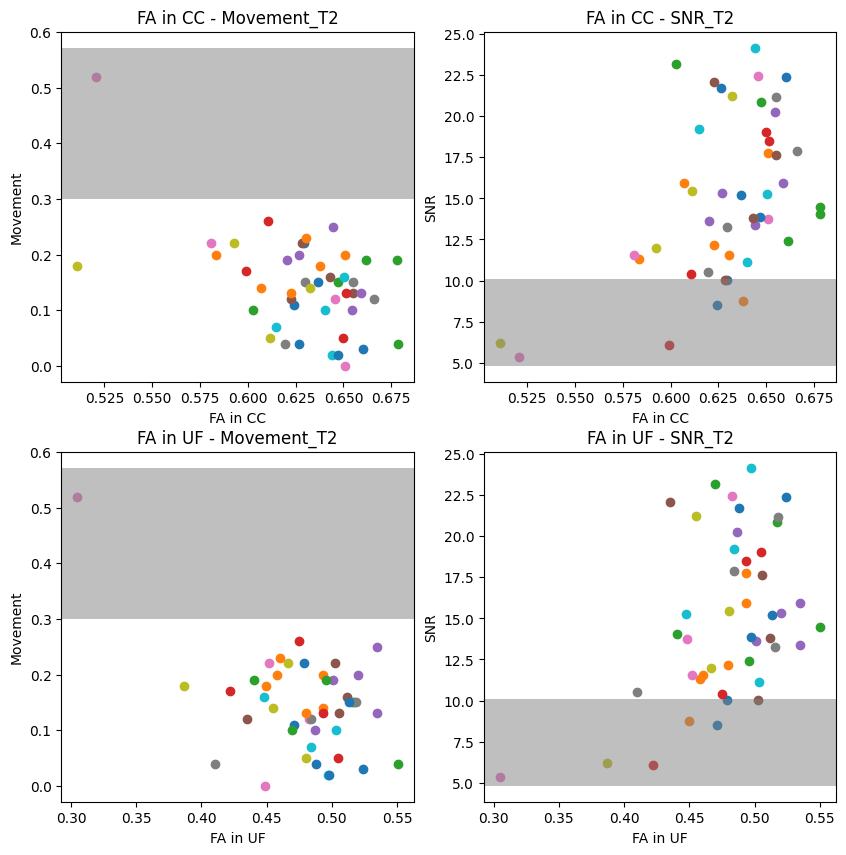

In [9]:
graph("T1", "FA", datas_p)
graph("T2", "FA", datas_p)

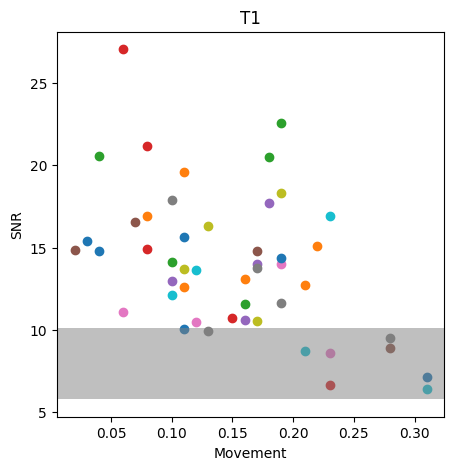

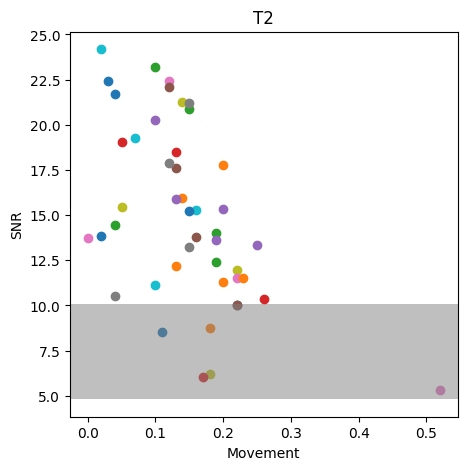

In [10]:
SNR_to_mouv("T1", datas_p)
SNR_to_mouv("T2", datas_p)

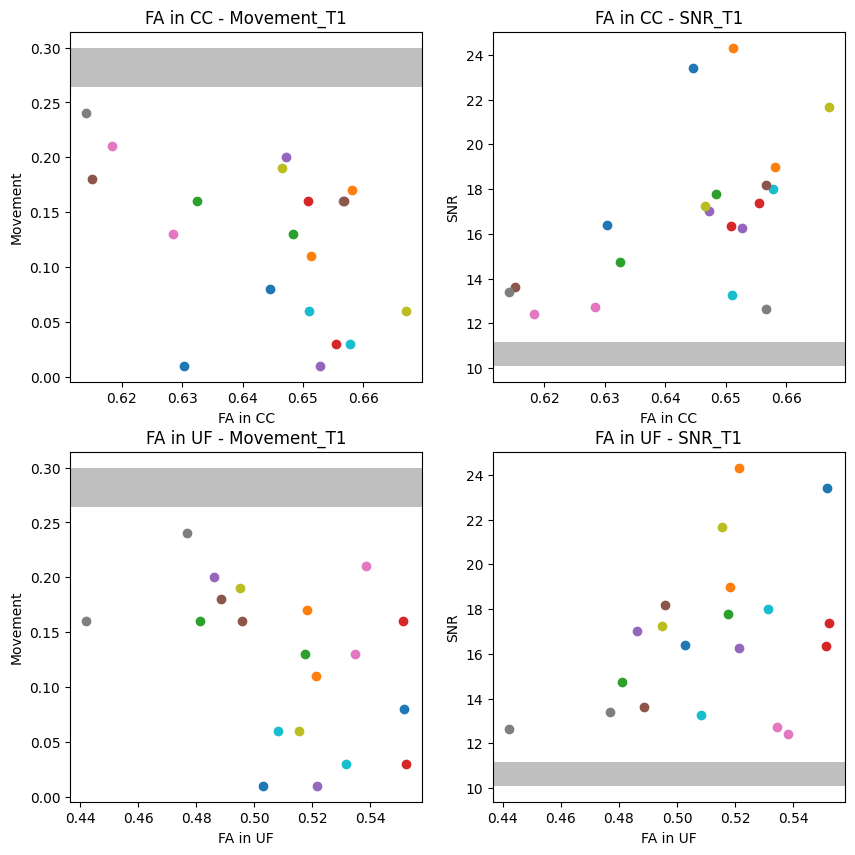

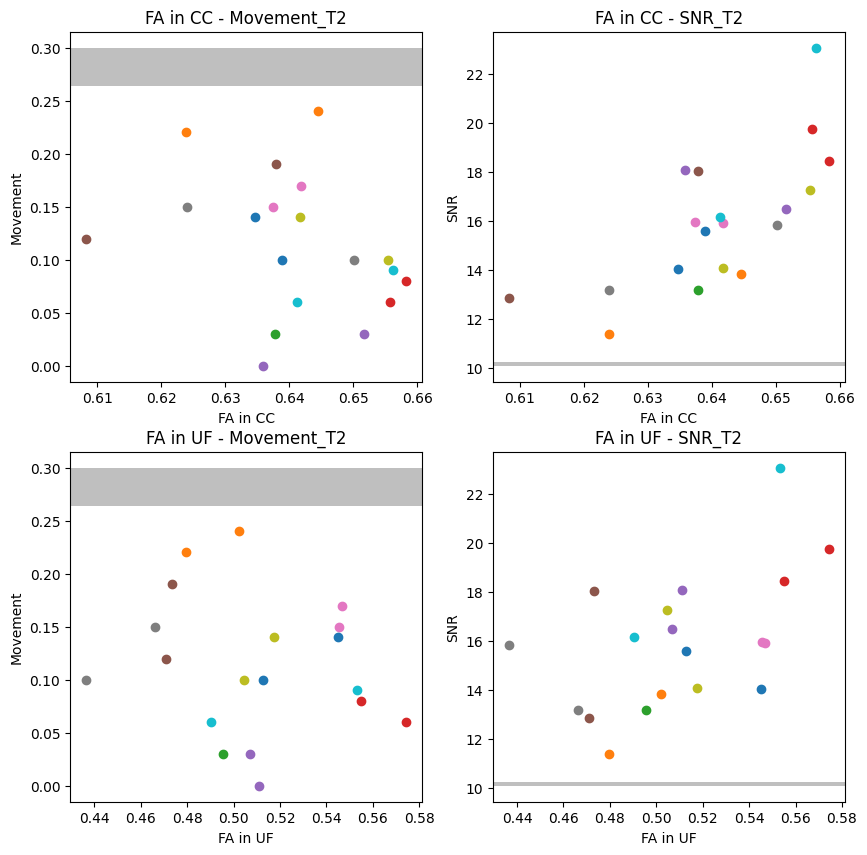

In [11]:
graph("T1", "FA", datas_c)
graph("T2", "FA", datas_c)

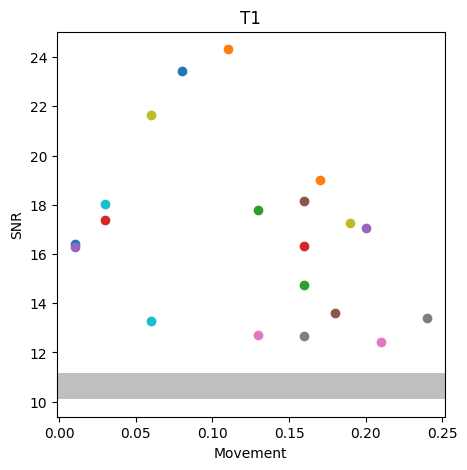

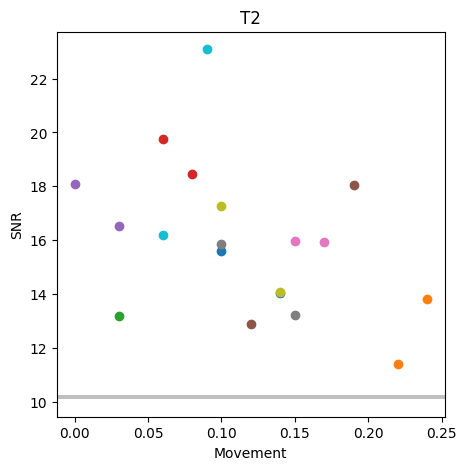

In [12]:
SNR_to_mouv("T1", datas_c)
SNR_to_mouv("T2", datas_c)

In [13]:
def excluded_subjects(data):
    excluded_subj={"T1": [], "T2": []}
    for sub in (data["Numéro"]):
        for t in ["T1", "T2"]:
            SNR = list(data[data["Numéro"] == sub]["SNR_" + t])[0]
            #print(type(SNR), SNR<10)
            if (SNR < 10):
                excluded_subj[t].append(sub)
    return excluded_subj

excluded_sujects_p = excluded_subjects(datas_p)
print(excluded_sujects_p)
excluded_sujects_c = excluded_subjects(datas_c)
print(excluded_sujects_c)

{'T1': ['sub01', 'sub08', 'sub10', 'sub17', 'sub34', 'sub36', 'sub40', 'sub48'], 'T2': ['sub11', 'sub17', 'sub29', 'sub34', 'sub42']}
{'T1': [], 'T2': []}


{'T1': ['sub01', 'sub08', 'sub10', 'sub17', 'sub21', 'sub34', 'sub36', 'sub40', 'sub48'], 'T2': ['sub01', 'sub11', 'sub17', 'sub29', 'sub34', 'sub36', 'sub42']}
{'T1': [], 'T2': []}

In [14]:
datas_c[["Numéro","SNR_T1", "SNR_T2"]].head(20)

,Numéro,SNR_T1,SNR_T2
0,sub54,16.389999,15.610000
1,sub55,19.000000,13.830000
2,sub56,14.730000,NaN
3,sub57,17.389999,19.770000
4,sub58,16.270000,16.520000
5,sub59,13.620000,12.880000
6,sub60,12.710000,15.980000
7,sub61,12.650000,15.860000
8,sub62,21.650000,17.270000
9,sub63,18.020000,23.090000


In [15]:
datas_p_T1 = datas_p[["Numéro", "SNR_T1","Movement_T1"]].drop(datas_p.index[[0,2,5,6,7,9,16,20,24,26,33,35,39,46,47,48]])
datas_p_T1.head()

,Numéro,SNR_T1,Movement_T1
1,sub02,15.12,0.22
3,sub04,14.92,0.08
4,sub05,13.99,0.17
8,sub09,18.33,0.19
10,sub11,14.80,0.04


In [16]:
datas_p_T2 = datas_p[["Numéro", "SNR_T2","Movement_T2"]].drop(datas_p.index[[0,9,10,15,16,22,28,33,35,37,41,43,46,48,51]])
datas_p_T2.head()

,Numéro,SNR_T2,Movement_T2
1,sub02,17.760000,0.20
2,sub03,14.020000,0.19
3,sub04,19.020000,0.05
4,sub05,20.260000,0.10
5,sub06,17.620001,0.13


In [17]:
datas_c_T1 = datas_c[["Numéro", "SNR_T1","Movement_T1"]]
datas_c_T1.head()

,Numéro,SNR_T1,Movement_T1
0,sub54,16.389999,0.01
1,sub55,19.000000,0.17
2,sub56,14.730000,0.16
3,sub57,17.389999,0.03
4,sub58,16.270000,0.01


In [18]:
datas_c_T2 = datas_c[["Numéro", "SNR_T2","Movement_T2"]].drop(datas_p.index[[2]])
datas_c_T2.head()

,Numéro,SNR_T2,Movement_T2
0,sub54,15.61,0.10
1,sub55,13.83,0.24
3,sub57,19.77,0.06
4,sub58,16.52,0.03
5,sub59,12.88,0.12


In [19]:
P_T1 = datas_p_T1["SNR_T1"]
P_T2 = datas_p_T2["SNR_T2"]
C_T1 = datas_c_T1["SNR_T1"]
C_T2 = datas_c_T2["SNR_T2"]


<AxesSubplot: >

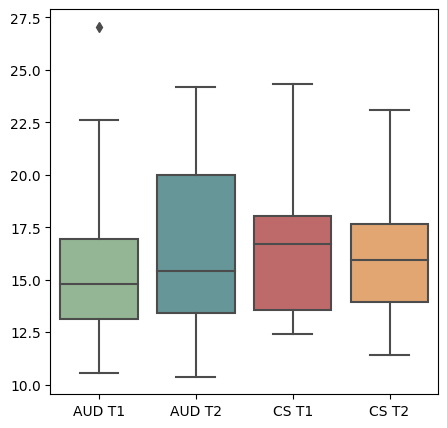

In [20]:
y = list(P_T1) + list(P_T2) + list(C_T1) +list(C_T2)
x= ["AUD T1"]*len(list(P_T1)) + ["AUD T2"]*len(list(P_T2)) + ["CS T1"]*len(list(C_T1)) + ["CS T2"]*len(list(C_T2))

color = ["darkseagreen","cadetblue", "indianred", "sandybrown"] 
sns.boxplot(y=y,x=x,palette = color) #, showmeans=True,meanprops={'marker':"_",'markeredgecolor':'white', 'markersize':"55"})
        

In [21]:
P_T1 = datas_p_T1["Movement_T1"]
P_T2 = datas_p_T2["Movement_T2"]
C_T1 = datas_c_T1["Movement_T1"]
C_T2 = datas_c_T2["Movement_T2"]


<AxesSubplot: >

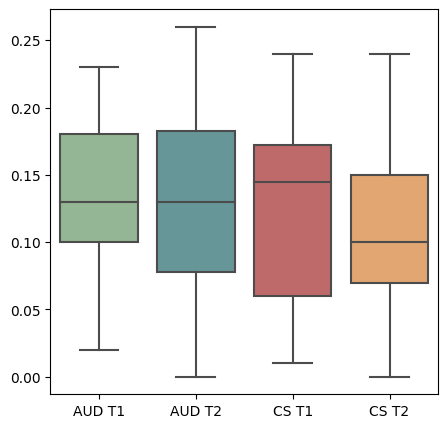

In [22]:
y = list(P_T1) + list(P_T2) + list(C_T1) +list(C_T2)
x= ["AUD T1"]*len(list(P_T1)) + ["AUD T2"]*len(list(P_T2)) + ["CS T1"]*len(list(C_T1)) + ["CS T2"]*len(list(C_T2))

color = ["darkseagreen","cadetblue", "indianred", "sandybrown"] 
sns.boxplot(y=y,x=x,palette = color) #, showmeans=True,meanprops={'marker':"_",'markeredgecolor':'white', 'markersize':"55"})
        